In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv("/content/sallaryprediction.csv")

In [3]:
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
# Count unique values in each column
unique_counts = df.nunique()
print(unique_counts)

Age                     31
Gender                   2
Education Level          3
Job Title              174
Years of Experience     28
Salary                  36
dtype: int64


In [7]:
# Print unique values in each column
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print()

Unique values in 'Age':
[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. nan]

Unique values in 'Gender':
['Male' 'Female' nan]

Unique values in 'Education Level':
["Bachelor's" "Master's" 'PhD' nan]

Unique values in 'Job Title':
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Suc

In [8]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [9]:
# Replace NaN values in numeric columns with the median
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

In [10]:
df.shape

(375, 6)

In [11]:
df.dropna(inplace=True)

In [14]:
job_title_counts = df['Job Title'].value_counts()
df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if job_title_counts[x] == 1 else x)


# **EDA**

In [18]:
# Distribution of Age
fig1 = px.histogram(df, x="Age", nbins=10, title="Distribution of Age")
fig1.show()

In [19]:
# Salary Distribution by Gender
fig2 = px.box(df, x="Gender", y="Salary", title="Salary Distribution by Gender")
fig2.show()

In [23]:
# Count of Job Titles
job_title_counts = df['Job Title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']
fig3 = px.bar(job_title_counts, x='Job Title', y='Count', title="Count of Job Titles")
fig3.show()

In [25]:
# Years of Experience vs Salary
fig4 = px.scatter(df, x="Years of Experience", y="Salary", color="Gender", title="Years of Experience vs Salary")
fig4.show()

In [26]:
# Salary Distribution by Education Level
fig5 = px.violin(df, x="Education Level", y="Salary", title="Salary Distribution by Education Level")
fig5.show()

In [27]:
df.drop_duplicates(inplace=True)

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
# One-hot encoding for categorical variables
categorical_features = ['Gender', 'Education Level', 'Job Title']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [30]:
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

# Optionally, split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the preprocessed data
print("Features (X):")
print(X)
print("\nTarget (y):")
print(y)

Features (X):
      Age  Years of Experience  Gender_Male  Education Level_Master's  \
0    32.0                  5.0         True                     False   
1    28.0                  3.0        False                      True   
2    45.0                 15.0         True                     False   
3    36.0                  7.0        False                     False   
4    52.0                 20.0         True                      True   
..    ...                  ...          ...                       ...   
348  28.0                  1.0        False                     False   
349  36.0                  8.0         True                     False   
350  44.0                 16.0        False                     False   
351  31.0                  3.0         True                     False   
371  43.0                 19.0         True                      True   

     Education Level_PhD  Job Title_Business Analyst  \
0                  False                       False 

# **Linear Regression**

R-squared (R2) Score: 0.89
Mean Squared Error (MSE): 252830937.83
Root Mean Squared Error (RMSE): 15900.66
Mean Absolute Percentage Error (MAPE): 15.12%


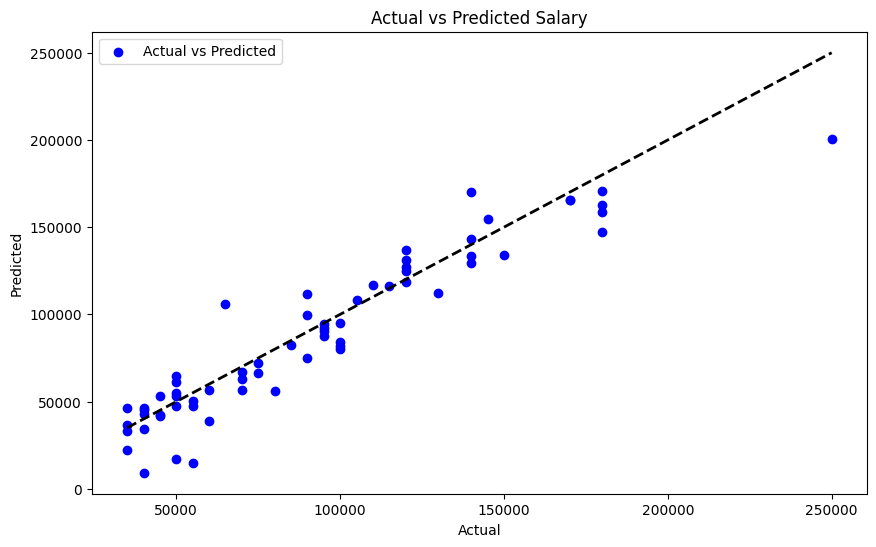

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2:.2f}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()

# **Random Forest**

R-squared (R2) Score for Random Forest: 0.90
Mean Squared Error (MSE) for Random Forest: 217034045.41
Root Mean Squared Error (RMSE) for Random Forest: 14732.08
Mean Absolute Percentage Error (MAPE) for Random Forest: 11.47%


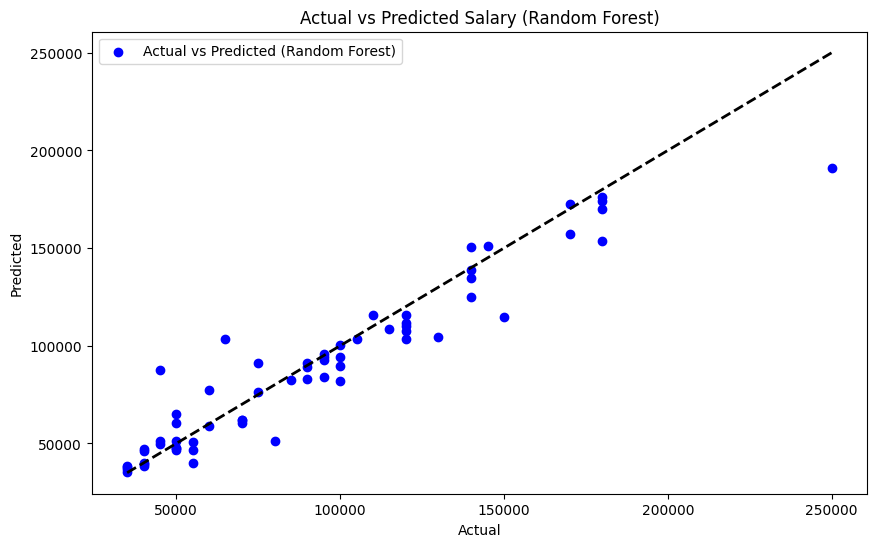

In [32]:
from sklearn.ensemble import RandomForestRegressor


# Initialize the model
model_rf = RandomForestRegressor(random_state=42)

# Fit the model
model_rf.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = model_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print(f'R-squared (R2) Score for Random Forest: {r2_rf:.2f}')

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (MSE) for Random Forest: {mse_rf:.2f}')

rmse_rf = np.sqrt(mse_rf)
print(f'Root Mean Squared Error (RMSE) for Random Forest: {rmse_rf:.2f}')

mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) for Random Forest: {mape_rf:.2f}%')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs Predicted (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salary (Random Forest)')
plt.legend()
plt.show()


# **GBM**

R-squared (R2) Score for GBM: 0.91
Mean Squared Error (MSE) for GBM: 196639592.72
Root Mean Squared Error (RMSE) for GBM: 14022.82
Mean Absolute Percentage Error (MAPE) for GBM: 11.61%


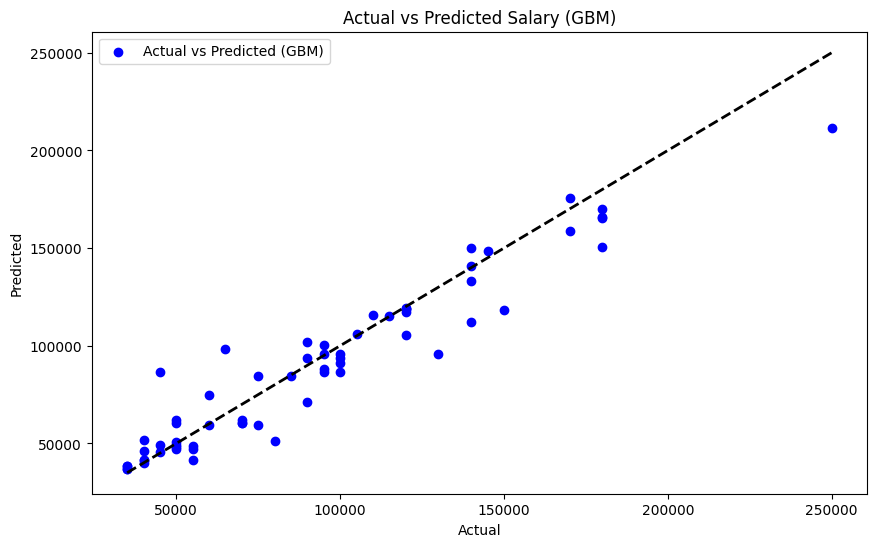

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the model
model_gbm = GradientBoostingRegressor(random_state=42)

# Fit the model
model_gbm.fit(X_train, y_train)

# Predictions on the test set
y_pred_gbm = model_gbm.predict(X_test)

# Evaluation metrics
r2_gbm = r2_score(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
mape_gbm = np.mean(np.abs((y_test - y_pred_gbm) / y_test)) * 100

print(f'R-squared (R2) Score for GBM: {r2_gbm:.2f}')
print(f'Mean Squared Error (MSE) for GBM: {mse_gbm:.2f}')
print(f'Root Mean Squared Error (RMSE) for GBM: {rmse_gbm:.2f}')
print(f'Mean Absolute Percentage Error (MAPE) for GBM: {mape_gbm:.2f}%')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, color='blue', label='Actual vs Predicted (GBM)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salary (GBM)')
plt.legend()
plt.show()


R-squared (R2) Score for XGBoost: 0.92
Mean Squared Error (MSE) for XGBoost: 188556110.86
Root Mean Squared Error (RMSE) for XGBoost: 13731.57
Mean Absolute Percentage Error (MAPE) for XGBoost: 11.37%


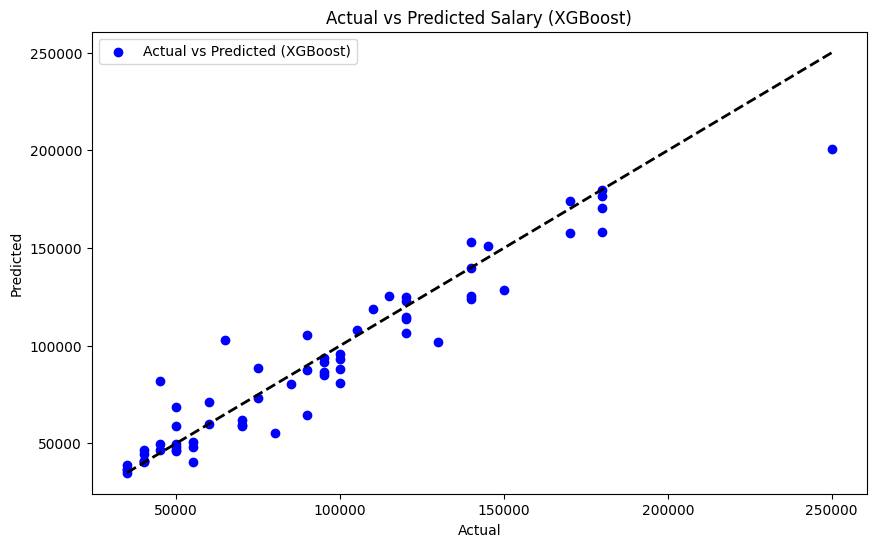

In [36]:
from xgboost import XGBRegressor
# Initialize the model
model_xgb = XGBRegressor(random_state=42)

# Fit the model
model_xgb.fit(X_train, y_train)

# Predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluation metrics
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

print(f'R-squared (R2) Score for XGBoost: {r2_xgb:.2f}')
print(f'Mean Squared Error (MSE) for XGBoost: {mse_xgb:.2f}')
print(f'Root Mean Squared Error (RMSE) for XGBoost: {rmse_xgb:.2f}')
print(f'Mean Absolute Percentage Error (MAPE) for XGBoost: {mape_xgb:.2f}%')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='Actual vs Predicted (XGBoost)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salary (XGBoost)')
plt.legend()
plt.show()


In [37]:
models = ['XGBoost', 'GBM', 'Random Forest', 'Linear Regression']
r2_scores = [0.92, 0.91, 0.90, 0.89]
data = pd.DataFrame({
    'Model': models,
    'R-squared (R2)': r2_scores,
})
# Create traces for each metric
fig = go.Figure()

# R-squared (R2)
fig.add_trace(go.Bar(
    x=data['Model'],
    y=data['R-squared (R2)'],
    name='R-squared (R2)',
    marker_color='blue'
))
# Update layout
fig.update_layout(
    barmode='group',
    title='Comparison of Evaluation Metrics Across Models',
    xaxis_tickangle=-45,
    xaxis_title='Models',
    yaxis_title='Metric Value',
    legend_title='Metrics'
)

# Show the plot
fig.show()

Iteration 1 - R-squared (R2) Score: 0.9020
Iteration 2 - R-squared (R2) Score: 0.9149
Iteration 3 - R-squared (R2) Score: 0.8378
Iteration 4 - R-squared (R2) Score: 0.8205
Iteration 5 - R-squared (R2) Score: 0.8148
Iteration 6 - R-squared (R2) Score: 0.8516
Iteration 7 - R-squared (R2) Score: 0.8117
Iteration 8 - R-squared (R2) Score: 0.9290
Iteration 9 - R-squared (R2) Score: 0.8505
Iteration 10 - R-squared (R2) Score: 0.9206

Average Cross-Validated R-squared (R2) Score: 0.8653


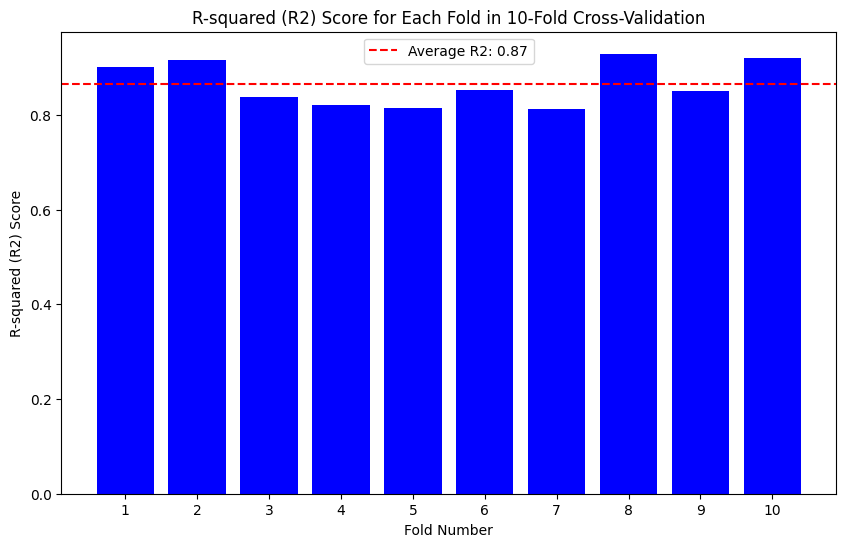

In [39]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
model_xgb = XGBRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X), 1):
    X_train_cv, X_valid_cv = X.iloc[train_idx], X.iloc[valid_idx]
    y_train_cv, y_valid_cv = y.iloc[train_idx], y.iloc[valid_idx]

    model_xgb.fit(X_train_cv, y_train_cv)
    y_pred_cv = model_xgb.predict(X_valid_cv)
    accuracy = r2_score(y_valid_cv, y_pred_cv)
    accuracies.append(accuracy)
    print(f"Iteration {fold} - R-squared (R2) Score: {accuracy:.4f}")

average_accuracy = np.mean(accuracies)
print(f"\nAverage Cross-Validated R-squared (R2) Score: {average_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, 11), accuracies, color='blue')
plt.xlabel('Fold Number')
plt.ylabel('R-squared (R2) Score')
plt.title('R-squared (R2) Score for Each Fold in 10-Fold Cross-Validation')
plt.xticks(np.arange(1, 11))
plt.axhline(y=average_accuracy, color='r', linestyle='--', label=f'Average R2: {average_accuracy:.2f}')
plt.legend()
plt.show()


In [44]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder

# Assume model_xgb is already trained and X_train, y_train are defined as in your example
# Also assume categorical features and other preprocessing steps are defined as before

def predict_salary(model, input_data, categorical_features, numerical_features, target_column):
    # Convert input data to DataFrame
    user_df = pd.DataFrame([input_data])

    # One-hot encode categorical variables
    user_df_encoded = pd.get_dummies(user_df, columns=categorical_features, drop_first=True)

    # Ensure columns match X_train
    missing_cols = set(X_train.columns) - set(user_df_encoded.columns)
    for col in missing_cols:
        user_df_encoded[col] = 0  # Add missing columns with default value

    user_df_encoded = user_df_encoded[X_train.columns]  # Ensure column order is the same as X_train

    # Predict using the model
    salary_prediction = model_xgb.predict(user_df_encoded)

    return salary_prediction[0]

# Example user input
user_input = {
    'Age': 32,
    'Gender': 'Male',
    'Education Level': "Master's",
    'Job Title': 'Data Analyst',
    'Years of Experience': 5
}

# Example prediction using the function
predicted_salary = predict_salary(model_xgb, user_input, categorical_features, numerical_features=None, target_column='Salary')

print(f'Predicted Salary: Rs {predicted_salary:,.2f}')


Predicted Salary: $63,903.12


In [46]:
def predict_salary(model, input_data, categorical_features, numerical_features=None, target_column='Salary'):
    # Convert input data to DataFrame
    user_df = pd.DataFrame([input_data])

    # One-hot encode categorical variables
    user_df_encoded = pd.get_dummies(user_df, columns=categorical_features, drop_first=True)

    # Ensure columns match X_train
    missing_cols = set(X_train.columns) - set(user_df_encoded.columns)
    for col in missing_cols:
        user_df_encoded[col] = 0  # Add missing columns with default value

    user_df_encoded = user_df_encoded[X_train.columns]  # Ensure column order is the same as X_train

    # Predict using the model
    salary_prediction = model.predict(user_df_encoded)

    return salary_prediction[0]

# Example user input (interactive)
user_input = {
    'Age': float(input("Enter Age: ")),
    'Gender': input("Enter Gender (Male/Female): "),
    'Education Level': input("Enter Education Level (Bachelor's/Master's/PhD): "),
    'Job Title': input("Enter Job Title: "),
    'Years of Experience': float(input("Enter Years of Experience: "))
}

# Example prediction using the function
predicted_salary = predict_salary(model_xgb, user_input, categorical_features, numerical_features=None, target_column='Salary')

print(f'Predicted Salary: Rs {predicted_salary:,.2f}')


Enter Age: 50
Enter Gender (Male/Female): Female
Enter Education Level (Bachelor's/Master's/PhD): PhD
Enter Job Title: Data Scientist
Enter Years of Experience: 25
Predicted Salary: Rs 231,678.84


In [47]:
import joblib
joblib.dump(model_xgb, 'salary_prediction_model.pkl')

['salary_prediction_model.pkl']

In [51]:
X_train.columns

Index(['Age', 'Years of Experience', 'Gender_Male', 'Education Level_Master's',
       'Education Level_PhD', 'Job Title_Business Analyst',
       'Job Title_Customer Service Manager', 'Job Title_Data Analyst',
       'Job Title_Director of Engineering', 'Job Title_Director of Finance',
       'Job Title_Director of Human Resources',
       'Job Title_Director of Marketing', 'Job Title_Director of Operations',
       'Job Title_Event Coordinator', 'Job Title_HR Generalist',
       'Job Title_HR Manager', 'Job Title_Junior Account Manager',
       'Job Title_Junior Accountant', 'Job Title_Junior Business Analyst',
       'Job Title_Junior Business Development Associate',
       'Job Title_Junior Business Operations Analyst',
       'Job Title_Junior Financial Analyst', 'Job Title_Junior HR Coordinator',
       'Job Title_Junior HR Generalist', 'Job Title_Junior Marketing Analyst',
       'Job Title_Junior Marketing Coordinator',
       'Job Title_Junior Marketing Manager',
       'Job T